## CNN 짜기
1. king_11.csv
2. text 열을 가져오기

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 데이터 로드
file = '../data/king_3.csv'
data = pd.read_csv(file, encoding='utf-8', sep=';')

# 데이터 확인
# print(data['text'].head())

# 토크나이저
from konlpy.tag import Okt
Okt = Okt()
data_token = []

for line in data['text']:
    # 토크나이징
    tokens = Okt.nouns(line)
    # 정규표현식으로 한글만 추출
    tokens = [token for token in tokens if re.match(r'^[가-힣]+$', token)]
    
    # 데이터프레임에 추가
    data_token.append(tokens)

print(data_token[:5])


In [62]:
vocab = {}
for tokens in data_token:
    # 빈도수 계산
    for token in tokens:
        if token not in vocab:
            vocab[token] = 1
        else:
            vocab[token] += 1

# 빈도수 정렬
vocab = dict(sorted(vocab.items(), key=lambda x: x[1], reverse=True))

print(len(vocab), list(vocab.items())[:20])

# 한 글자 제거
vocab_1 = {word: freq for word, freq in vocab.items() if len(word) > 1}
print(len(vocab_1), list(vocab_1.items())[:20])

# 불용어 제거
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '것', '수', '그', '을', '등', '또']
vocab_stp = {word: freq for word, freq in vocab_1.items() if word not in stopwords}
print(len(vocab_stp), list(vocab_stp.items())[:20])

# 빈도수 1이하 제거
vocab_2 = {word: freq for word, freq in vocab_stp.items() if freq > 1}
print(len(vocab_2), list(vocab_2.items())[:20])

4876 [('것', 1388), ('의', 763), ('를', 726), ('이', 713), ('말', 613), ('그', 521), ('임금', 465), ('등', 340), ('사람', 310), ('전하', 239), ('모두', 238), ('수', 238), ('태상왕', 221), ('하니', 207), ('일', 196), ('청', 193), ('로', 189), ('죄', 189), ('또', 179), ('신', 175)]
4462 [('임금', 465), ('사람', 310), ('전하', 239), ('모두', 238), ('태상왕', 221), ('하니', 207), ('지금', 155), ('나라', 148), ('또한', 144), ('마음', 122), ('세자', 121), ('군사', 116), ('생각', 115), ('여러', 113), ('반드시', 112), ('문하부', 96), ('어찌', 94), ('가지', 94), ('백성', 89), ('다시', 86)]
4462 [('임금', 465), ('사람', 310), ('전하', 239), ('모두', 238), ('태상왕', 221), ('하니', 207), ('지금', 155), ('나라', 148), ('또한', 144), ('마음', 122), ('세자', 121), ('군사', 116), ('생각', 115), ('여러', 113), ('반드시', 112), ('문하부', 96), ('어찌', 94), ('가지', 94), ('백성', 89), ('다시', 86)]
2484 [('임금', 465), ('사람', 310), ('전하', 239), ('모두', 238), ('태상왕', 221), ('하니', 207), ('지금', 155), ('나라', 148), ('또한', 144), ('마음', 122), ('세자', 121), ('군사', 116), ('생각', 115), ('여러', 113), ('반드시', 112), ('문하부', 96), ('

In [63]:
# 인코딩
word_to_index = {word: index + 2 for index, (word, freq) in enumerate(vocab_2.items())}
word_to_index['<unk>'] = 1
word_to_index['<pad>'] = 0

index_to_word = {index: word for word, index in word_to_index.items()}
vocab_size = len(word_to_index)
print(vocab_size)

# 텍스트를 인덱스로 변환
data_index = []
for tokens in data_token:
    # 없으면 <unk>로 대체
    tokens = [token if token in word_to_index else '<unk>' for token in tokens]
    # 인덱스로 변환
    tokens = [word_to_index[token] for token in tokens]
    data_index.append(tokens)
    
print(data_token[:20])
print(data_index[:20])

2486
[['사헌부', '상소', '대저', '인주', '의', '마음', '만화', '의', '근원', '정치', '의', '득실', '과', '민생', '의', '이해', '만약', '이', '먼저', '그', '마음', '바르게', '호의', '사의', '도', '처사', '사이', '행', '정사', '송사', '인심', '화순', '천지', '태평', '다시', '무슨', '를', '걱정', '것', '지난해', '겨울', '료', '바', '백성', '편안', '케', '조목', '언관', '이', '소장', '은', '모두', '병', '전하', '석', '지금', '또', '료', '숨기', '말', '전하', '명', '조례', '상정', '도감', '방', '일찍이', '제도', '섭렵', '시무', '를', '배속', '그', '판사', '제공', '이하', '명', '관령', '수전', '육수', '의', '모든', '인물', '차역', '따위', '일', '방', '붙이', '요부', '전폐', '의', '모든', '국가', '수용', '것', '수륙', '의', '운수', '따위', '일', '방', '붙이', '제도', '금령', '의', '모든', '국가', '기강', '이', '것', '방', '전후', '헌', '사목', '유', '대로', '곧', '방', '의논', '연후', '판사', '진달', '판사', '그', '가부', '참작', '것', '좇', '결정', '황원', '미처', '두루', '알', '것', '것', '사람', '것', '각도', '이첩', '모두', '정문', '보고', '참고', '금세', '고제', '백성', '또한', '관', '것', '취하', '위로', '천총', '계달', '문적', '분부', '의', '각', '장관', '이', '신', '행', '법', '누가', '성화', '가운데', '서경', '말', '말', '네', '마음', '거', '스리', '것', '반드시', '도', 

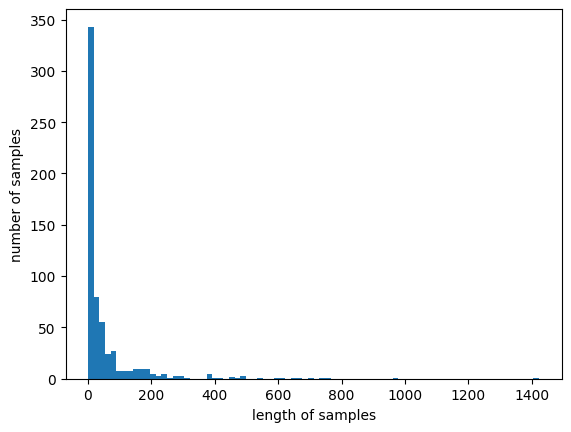

최대 길이: 1423
최소 길이: 1
평균 길이: 58.58814102564103
중간 길이: 14.0


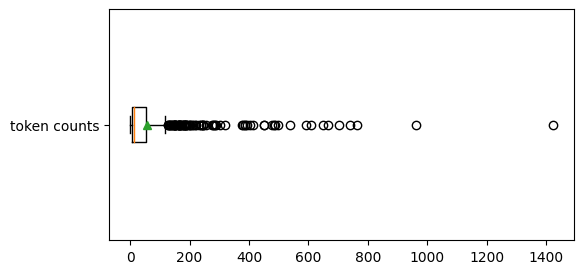

In [64]:
# 패딩
# - 문장 길이 분포 확인
# - 최대, 최소, 평균, 중간값
total_len = [len(tokens) for tokens in data_index]
plt.hist(total_len, bins=80)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

print('최대 길이:', np.max(total_len))
print('최소 길이:', np.min(total_len))
print('평균 길이:', np.mean(total_len))
print('중간 길이:', np.median(total_len))

# 박스플롯
plt.figure(figsize=(6, 3))
plt.boxplot(total_len, labels=['token counts'], showmeans=True, vert=False)
plt.show()

624 614


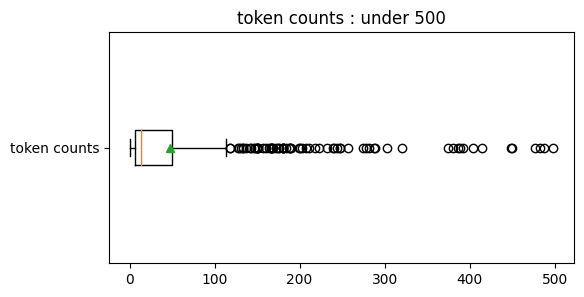

In [65]:
# 문장 길이가 500 이상인 데이터 제거
data_index_500 = [tokens for tokens in data_index if len(tokens) < 500]
print(len(data_index), len(data_index_500))

plt.figure(figsize=(6, 3))
plt.boxplot([len(tokens) for tokens in data_index_500], labels=['token counts'], showmeans=True, vert=False)
plt.title('token counts : under 500')
plt.show()

614 599


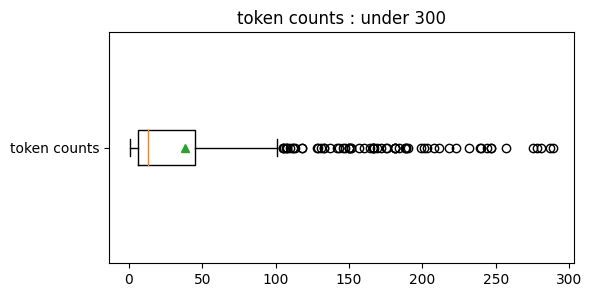

In [66]:
# 300 이하 제거
data_index_300 = [tokens for tokens in data_index_500 if len(tokens) < 300]
print(len(data_index_500), len(data_index_300))

plt.figure(figsize=(6, 3))
plt.boxplot([len(tokens) for tokens in data_index_300], labels=['token counts'], showmeans=True, vert=False)
plt.title('token counts : under 300')
plt.show()

In [67]:
# %pip install wordcloud

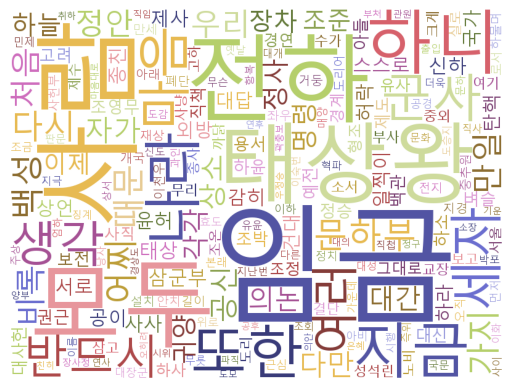

In [69]:
# vocab2 Wordcloud
from wordcloud import WordCloud
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600, colormap='tab20b')
wc.generate_from_frequencies(vocab_2)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [83]:

# 패딩
# - 문장 길이가 300 이하인 데이터만 사용
max_len = 300
data_pad = []
for tokens in data_index:
    if len(tokens) < max_len:
        tokens += [word_to_index['<pad>']] * (max_len - len(tokens))
        data_pad.append(tokens)
    # 300 이상은 300 단어까지만 사용
    else:
        data_pad.append(tokens[:300])
        
data_pad = np.array(data_pad)
print(data_pad[:5], data_pad.shape)

[[ 122   30  246 ...    0    0    0]
 [   1 1056 1761 ...    0    0    0]
 [ 341 1326    1 ...    0    0    0]
 [1058    1    1 ...    0    0    0]
 [ 544    2 1059 ...    0    0    0]] (624, 300)


패딩까지 완료

In [84]:
# month 추출 : '10월' 형식이므로 숫자만 정수로 추출
month = data['month'].str.extract('(\d+)')
# print(month.head())
print(month.value_counts())
print(month[0], type(month[0]))

# 헐 재위기간이 너무 짧아 1월뿐이다...

1     69
11    63
8     63
10    56
7     54
3     51
2     50
4     49
6     46
12    43
5     41
9     39
Name: count, dtype: int64
0      10
1      10
2      10
3      10
4      10
       ..
619     9
620     9
621     9
622     9
623     9
Name: 0, Length: 624, dtype: object <class 'pandas.core.series.Series'>


In [97]:
# CNN model
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# 데이터셋 생성
# - 데이터 : data_pad
# - 타겟 : month

class Mydataset(torch.utils.data.Dataset):
    def __init__(self, data, target):
        self.data = torch.Tensor(data).long()
        self.target = target.values.astype(np.int64)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]
        return x, y
    
Mydatasets = Mydataset(data_pad, month)
print(len(Mydatasets), Mydatasets[0])

624 (tensor([ 122,   30,  246,  203,    1,   11,    1,    1,  389,  130,    1,  867,
           1,  632,    1,  633, 1750,    1,  121,    1,   11,  540,    1,  265,
           1,    1,  174,    1,   35,  634,  230,    1,  266,  486,   21,  147,
           1, 1051,    1,  868,  635,    1,    1,   20, 1751,    1,  729,  869,
           1,  183,    1,    5,    1,    4,    1,    8,    1,    1, 1052,    1,
           4,    1,  870, 1053,  152,    1,   56,   72, 1752, 1054,    1,    1,
           1,  313,  730,  131,    1, 1753, 1322,    1,    1,  871,    1,    1,
        1323,    1,    1, 1754,    1,    1,    1,  871,   60,    1,    1,  731,
           1,  732, 1323,    1,    1, 1754,   72,  636,    1,  871,   60,  231,
           1,    1,    1, 1755,    1,    1,    1,  541,    1,    1,   33,  184,
         313,  267,  313,    1, 1324,  872,    1,    1,  232,    1,  733,  734,
           1,    1,    1,    3,    1,  247, 1055,    5,    1,  102,    1, 1756,
        1757,   20,   10,    1,    

In [147]:

# CNN 모델
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_size, output_size, kernel_size, stride, padding):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.conv = nn.Conv1d(in_channels=embedding_size, out_channels=output_size, kernel_size=kernel_size, stride=stride, padding=padding)
        self.fc = nn.Linear(output_size, 12)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.embedding(x)
        x = self.conv(x)
        x = F.max_pool1d(x, x.size(2)).squeeze(2)
        x = self.fc(x)
        x = self.softmax(x)
        return x
    
# 모델 생성
vocab_size = len(word_to_index)
embedding_size = 300            # 워드 벡터 차원
output_size = 128               # 출력 채널 수
kernel_size = 10                # 한번에 처리할 일 수 : 열흘
stride = 2                      # 스트라이드
padding = 1                     # 패딩

model = CNN(vocab_size, embedding_size, output_size, kernel_size, stride, padding)
print(model)

CNN(
  (embedding): Embedding(2486, 300)
  (conv): Conv1d(300, 128, kernel_size=(10,), stride=(2,), padding=(1,))
  (fc): Linear(in_features=128, out_features=12, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
# 학습
# - 데이터셋 분리
random_split = torch.utils.data.random_split(Mydatasets, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

# - 데이터셋 생성
train_dataset, test_dataset = random_split
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 확인
for x, y in train_loader:
    print(x.shape, y.shape)
    break


torch.Size([64, 300]) torch.Size([64, 1])


In [161]:
# - 모델, 손실함수, 최적화함수
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Epoch = 100

# - 학습
model.train()
for epoch in range(Epoch):
    total_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        y = y-1 # 1월부터 시작하므로 1을 뺌
        y = y.view(-1)
        # 가장 높은 확률의 인덱스를 반환        
        # print(output.shape, y.shape)
        print(output, y)
        # print('dtype:', output.dtype, y.dtype)
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()        
        
        total_loss += loss.item()
    
    scheduler.step()
    if (epoch+1) % 5 == 0:
        print(f'epoch: {epoch+1}, loss: {total_loss:.4f}')


tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4013e-45, 0.0000e+00, 3.8956e-43, 3.4126e-38, 0.0000e+00,
         1.9618e-44, 0.0000e+00, 0.0000e+00, 8.6574e-41, 1.0000e+00, 4.8041e-31],
        [0.0000e+00, 0

KeyboardInterrupt: 

In [160]:

# 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        output = model(x)
        y = y-1
        y = y.view(-1)
        _, output_index = torch.max(output, 1)
        total += y.size(0)
        correct += (output_index == y).sum().float()
        
    print('Accuracy:', correct/total)
        

Accuracy: tensor(0.0726)
